In [367]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [368]:
# code here
df = sns.load_dataset('titanic')

In [369]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [370]:
df.pivot_table(index='sex',columns=['class','embark_town','alive'],values=['age','fare'])

/tmp/ipython-input-698193031.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns=['class','embark_town','alive'],values=['age','fare'])


age                                                     \
class           First                                                      
embark_town Cherbourg            Queenstown       Southampton              
alive              no        yes         no   yes          no        yes   
sex                                                                        
female          50.00  35.675676        NaN  33.0     13.5000  33.619048   
male            43.05  36.437500       44.0   NaN     45.3625  36.121667   

                                                                          \
class          Second                                                      
embark_town Cherbourg            Queenstown       Southampton              
alive              no        yes         no   yes          no        yes   
sex                                                                        
female            NaN  19.142857        NaN  30.0   36.000000  29.091667   
male             29.5   1.000000       57.0   NaN   33.414474  17.095000   

                                                                           \
class            Third                                                      
embark_town  Cherbourg            Queenstown       Southampton              
alive               no        yes         no   yes          no        yes   
sex                                                                         
female       20.700000  11.045455  28.100000  17.6   23.688889  22.548387   
male         27.555556  18.488571  28.076923  29.0   27.168478  22.933333   

                 fare                                                      \
class           First                                                       
embark_town Cherbourg             Queenstown       Southampton              
alive              no         yes         no   yes          no        yes   
sex                                                                         
female       28.71250  117.710019        NaN  90.0  151.550000  96.743298   
male         80.84716  112.197806       90.0   NaN   53.563316  51.832739   

                                                                            \
class           Second                                                       
embark_town  Cherbourg            Queenstown        Southampton              
alive               no        yes         no    yes          no        yes   
sex                                                                          
female             NaN  25.268457        NaN  12.35   18.250000  22.272951   
male         25.418225  25.433350      12.35    NaN   18.997561  20.516667   

                                                                               
class            Third                                                         
embark_town  Cherbourg           Queenstown            Southampton             
alive               no       yes         no        yes          no        yes  
sex                                                                            
female       14.653125  14.71722  10.904633  10.084033   21.969018  13.171842  
male          8.720842  11.43584  11.841550  12.916667   12.758689  17.033450

In [371]:
df.pivot_table(index=['sex','class','embark_town'],columns='alive',values=['age','fare'])

/tmp/ipython-input-502815423.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','class','embark_town'],columns='alive',values=['age','fare'])


age                   fare            
alive                             no        yes          no         yes
sex    class  embark_town                                              
female First  Cherbourg    50.000000  35.675676   28.712500  117.710019
              Queenstown         NaN  33.000000         NaN   90.000000
              Southampton  13.500000  33.619048  151.550000   96.743298
       Second Cherbourg          NaN  19.142857         NaN   25.268457
              Queenstown         NaN  30.000000         NaN   12.350000
              Southampton  36.000000  29.091667   18.250000   22.272951
       Third  Cherbourg    20.700000  11.045455   14.653125   14.717220
              Queenstown   28.100000  17.600000   10.904633   10.084033
              Southampton  23.688889  22.548387   21.969018   13.171842
male   First  Cherbourg    43.050000  36.437500   80.847160  112.197806
              Queenstown   44.000000        NaN   90.000000         NaN
              Southampton  45.362500  36.121667   53.563316   51.832739
       Second Cherbourg    29.500000   1.000000   25.418225   25.433350
              Queenstown   57.000000        NaN   12.350000         NaN
              Southampton  33.414474  17.095000   18.997561   20.516667
       Third  Cherbourg    27.555556  18.488571    8.720842   11.435840
              Queenstown   28.076923  29.000000   11.841550   12.916667
              Southampton  27.168478  22.933333   12.758689   17.033450

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [372]:
# code here
df = pd.read_csv("https://tinyurl.com/2r24n45l")

In [373]:
df['brand_name'] = df['Name'].str.split().str.get(0)

In [374]:
df['car_name'] = df['Name'].str.split().str.get(1)

In [375]:
df['Year'] = df['Year'].astype(str)

In [376]:
df['Year'] = df['Year'].str[:4]

In [377]:
df['Year'].unique()

array(['2018', '2020', '2012', '2019', '2017', '2016', '2015', '2014',
       '2010', '2013', '2011', '2021', '2022', '2009', '2023'],
      dtype=object)

In [378]:
df.head()

,Name,Year,Miles,Price,brand_name,car_name
0,Chevrolet Trax,2018,41946,16990,Chevrolet,Trax
1,GMC Terrain,2020,45328,23990,GMC,Terrain
2,Jeep Wrangler,2012,81068,21590,Jeep,Wrangler
3,Jeep Renegade,2019,35372,21590,Jeep,Renegade
4,BMW X,2017,68992,22990,BMW,X


In [379]:
df['Year'].isin(['2018','2019','2020','2021','2022'])

,Year
0,True
1,True
2,False
3,True
4,False
...,...
21995,False
21996,False
21997,False
21998,True


<Axes: ylabel='Density'>

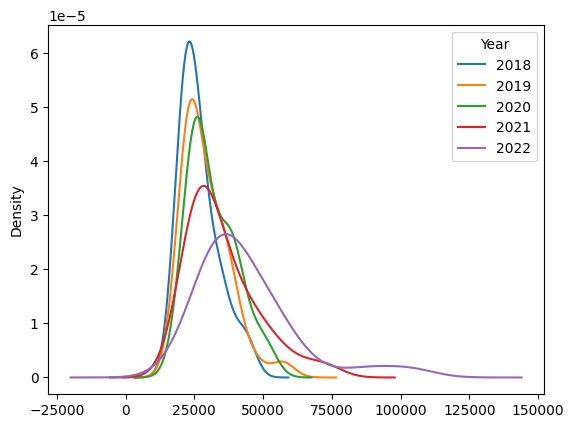

In [380]:
df[df['Year'].isin(['2018','2019','2020','2021','2022'])].pivot_table(index='brand_name'  , columns='Year' ,values=['Price','Miles'] ,aggfunc={'Price':'mean','Miles':'median'})['Price'].plot(kind='kde')

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [381]:
df=  pd.read_csv("https://tinyurl.com/2nq6kugt")

In [382]:
df['power_generation_required'] = df['Actual(MU)'] - df['Excess(+) / Shortfall (-)']

In [383]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [384]:
df['month'] = df['Dates'].dt.month

In [385]:
df['Power Station'].value_counts().head(10).index

Index(['NTPC Ltd.', 'NHPC', 'NPCIL', 'GMR ENERG', 'APL', 'JPPVL', 'IBPIL',
       'TATA PCL', 'JSWEL', 'NLC'],
      dtype='object', name='Power Station')

In [386]:
df.sort_values(by='month',inplace=True)

In [387]:
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,power_generation_required,month
27554,2018-01-29,RATTANINDIA,2700.00,1620.0,0.0,1620.0,0,7,22,15.89,0.0,6.11,1
27553,2018-01-29,PGPL,388.00,388.0,0.0,0.0,0,1,0,-1.39,0.0,1.39,1
27552,2018-01-29,NTPC Ltd.,14633.59,2838.0,200.0,2320.0,0,236,257,21.24,0.0,235.76,1
27551,2018-01-29,NSPCL,500.00,0.0,0.0,0.0,0,10,11,1.11,0.0,9.89,1
27550,2018-01-29,NPCIL,1840.00,760.0,760.0,0.0,0,25,26,0.95,0.0,25.05,1


In [390]:
df['month'] = df['month'].astype(str)

<Axes: xlabel='Power Station'>

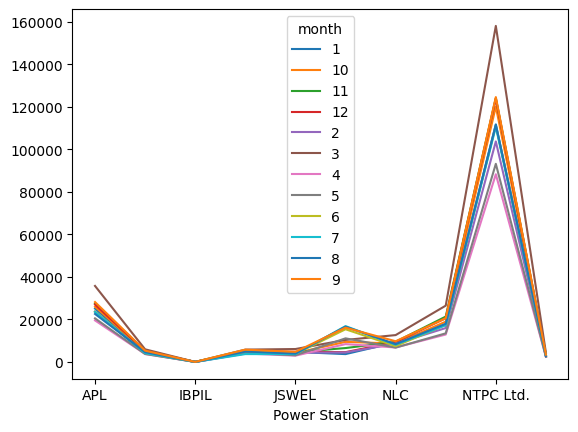

In [392]:
df[df['Power Station'].isin(df['Power Station'].value_counts().head(10).index)].pivot_table(index='Power Station',columns='month',values='power_generation_required',aggfunc='sum').plot()

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [393]:
df = pd.read_csv("/content/question-answer.csv")

In [394]:
df['question'] = df.loc[::2]['2']

In [395]:
df['answer'] = df.loc[1::2]['2']

In [396]:
df['answer']=df['answer'].shift(-1)

In [397]:
df =df[['question','answer']]

In [398]:
df.dropna(inplace=True)

In [399]:
df

,question,answer
0,Q1-What is Data Science?,"Ans1-Data Science combines statistics, maths, ..."
2,Q2-2. How is logistic regression done?,Ans2-Logistic regression measures the relation...
4,Q3-How do you build a random forest model?,Ans3-A random forest is built up of a number o...
6,Q4-How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...
8,Q5-You are given a data set consisting of vari...,Ans5-The following are ways to handle missing ...
10,Q6-What is bag of words? How we can use it for...,Ans6-Bag of Words is a representation of text ...
12,Q7-How can we use machine learning for text cl...,Ans7-Machine learning classification algorithm...
14,Q8-What is a time series?,Ans8-A time series is a set of observations or...
16,Q9-How is time series different from the usual...,Ans9-The principle behind causal forecasting i...
18,Q10-What are the different types of joins? Wha...,Ans10-(INNER) JOIN: Returns records that have ...


In [400]:
alt = pd.read_csv("/content/question-answer.csv")

In [401]:
alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20 non-null     int64 
 1   2           20 non-null     object
dtypes: int64(1), object(1)
memory usage: 452.0+ bytes


In [402]:
alt['2'][alt['2'].astype(str).str.startswith('Q')].str.split('-').str.get(1).values

array(['What is Data Science?', '2. How is logistic regression done?',
       'How do you build a random forest model?',
       'How can you avoid overfitting your model?',
       'You are given a data set consisting of variables with more than 30 percent missing values. How will you deal with them?',
       'What is bag of words? How we can use it for text classification?',
       'How can we use machine learning for text classification?',
       'What is a time series?',
       'How is time series different from the usual regression problem?',
       'What are the different types of joins? What are the differences between them?'],
      dtype=object)

In [403]:
alt['2'][alt['2'].astype(str).str.startswith('A')].str.split('-').str.get(1)

,2
1,"Data Science combines statistics, maths, speci..."
3,Logistic regression measures the relationship ...
5,A random forest is built up of a number of dec...
7,Overfitting refers to a model that is only set...
9,The following are ways to handle missing data ...
11,Bag of Words is a representation of text that ...
13,Machine learning classification algorithms pre...
15,A time series is a set of observations ordered...
17,The principle behind causal forecasting is tha...
19,(INNER) JOIN: Returns records that have matchi...


In [404]:
# merge them both

###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [405]:
questions = alt['2'][alt['2'].str.startswith('Q')].str.split('-').str.get(1).reset_index()
answers = alt['2'][alt['2'].str.startswith('A')].str.split('-').str.get(1).reset_index()

In [406]:
questions = questions[~(questions['2'].str.endswith("?"))]

In [407]:
answers

,index,2
0,1,"Data Science combines statistics, maths, speci..."
1,3,Logistic regression measures the relationship ...
2,5,A random forest is built up of a number of dec...
3,7,Overfitting refers to a model that is only set...
4,9,The following are ways to handle missing data ...
5,11,Bag of Words is a representation of text that ...
6,13,Machine learning classification algorithms pre...
7,15,A time series is a set of observations ordered...
8,17,The principle behind causal forecasting is tha...
9,19,(INNER) JOIN: Returns records that have matchi...


In [408]:
questions.merge(answers,left_index=True,right_index=True).drop(columns=['index_x','index_y'])

,2_x,2_y


###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [409]:
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

Show activity details month wise. Show count for each activity

In [410]:
df = log_file.merge(employee,right_on='EMPLOYEE_ID',left_on='emp_id',how='left')

In [411]:
df['dt'] = pd.to_datetime(df['dt'])

In [412]:
df['months'] = df['dt'].dt.month_name()

In [413]:
df.pivot_table(index='months',columns='activity',aggfunc='count',values='Log_ID')

activity,Checking,Cleaning,Inspection,Repair
months,,,,
April,5,11,9,5
August,8,10,9,4
December,6,7,12,6
February,7,7,4,10
January,7,10,9,5
July,6,6,14,5
June,5,7,8,10
March,8,6,5,12
May,5,8,7,11


Find employee who did most activity in January month.

In [414]:
df[df['months']=='January'].pivot_table(index='EMPLOYEE_ID',columns='months',values='activity',aggfunc='count').reset_index().sort_values(by='January').tail(1)

months,EMPLOYEE_ID,January
11,122.0,3


Employee who have worked most no of times on Weekends.

In [415]:
df['days'] = df['dt'].dt.day_name()

In [416]:
df[df['days'].isin(['Friday','Saturday','Sunday'])].pivot_table(index='EMPLOYEE_ID',columns='days',values='activity',aggfunc='count',margins=True).sort_values(by='All').iloc[-2]

,140.0
days,
Friday,2.0
Saturday,3.0
Sunday,1.0
All,6.0


Which activity is logged most on buisness days.

In [417]:
df[df['days'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])].pivot_table(index='activity',columns='days',values='Log_ID',aggfunc='count',margins=True).sort_values(by='All',ascending=False).reset_index()[['activity','All']].iloc[1].values

array(['Inspection', np.int64(77)], dtype=object)

Week Days wise activity table.

In [418]:
df[df['days'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])].pivot_table(index='days',columns='activity',aggfunc='count',values='Log_ID')

activity,Checking,Cleaning,Inspection,Repair
days,,,,
Friday,8,16,20,9
Monday,10,14,13,15
Thursday,8,16,16,12
Tuesday,15,9,15,13
Wednesday,14,9,13,16


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [419]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EMPLOYEE_ID  41 non-null     int64 
 1   FIRST_NAME   38 non-null     object
 2   LAST_NAME    41 non-null     object
 3   EMAIL        41 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


In [420]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


In [422]:
employee['FIRST_NAME'].fillna(employee['EMAIL'].str[0]+employee['LAST_NAME'].str[0],inplace=True)

/tmp/ipython-input-1604572899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employee['FIRST_NAME'].fillna(employee['EMAIL'].str[0]+employee['LAST_NAME'].str[0],inplace=True)


In [423]:
# code here
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'. E.g- Email field -> JMURMAN result -> JMURMAN@CAMPUSX.COM

In [425]:
employee['EMAIL'] = employee['EMAIL'].str[:] + "@CAMPUSX.COM"

In [452]:
employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,Full_name
0,100,Steven,King,SKING@CAMPUSX.COM,Steven King
1,101,Neena,Kochhar,NKOCHHAR@CAMPUSX.COM,Neena Kochhar
2,102,Lex,De Haan,LDEHAAN@CAMPUSX.COM,Lex De Haan
3,103,Alexander,Hunold,AHUNOLD@CAMPUSX.COM,Alexander Hunold
4,104,Bruce,Ernst,BERNST@CAMPUSX.COM,Bruce Ernst


Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [450]:
employee['Full_name'] = employee['FIRST_NAME'].str[:] +" "+ employee['LAST_NAME'].str[:]

In [451]:
employee[employee['FIRST_NAME'].str.startswith('A')].merge(df[log_file['activity'].isin(['Incpection', 'Cleaning', 'Checking'])],left_on='EMPLOYEE_ID',right_on='emp_id').reset_index()['Full_name'].value_counts()

/tmp/ipython-input-4237793073.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  employee[employee['FIRST_NAME'].str.startswith('A')].merge(df[log_file['activity'].isin(['Incpection', 'Cleaning', 'Checking'])],left_on='EMPLOYEE_ID',right_on='emp_id').reset_index()['Full_name'].value_counts()


,count
Full_name,
Alexander Khoo,5
Alexander Hunold,3
